# Random Forests

Based on post by Oxford Protein Informatics Group.  

The post can be found [Here](http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/)

## Random Forests for Classification

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [53]:
iris = datasets.load_iris()

In [54]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# sklearn provides the iris species as an integer value since this is required for classification
# here we are just adding a column with the specifies names to the dataframe for visualization purposes
df['species'] = np.array([iris.target_names[i] for i in iris.target])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


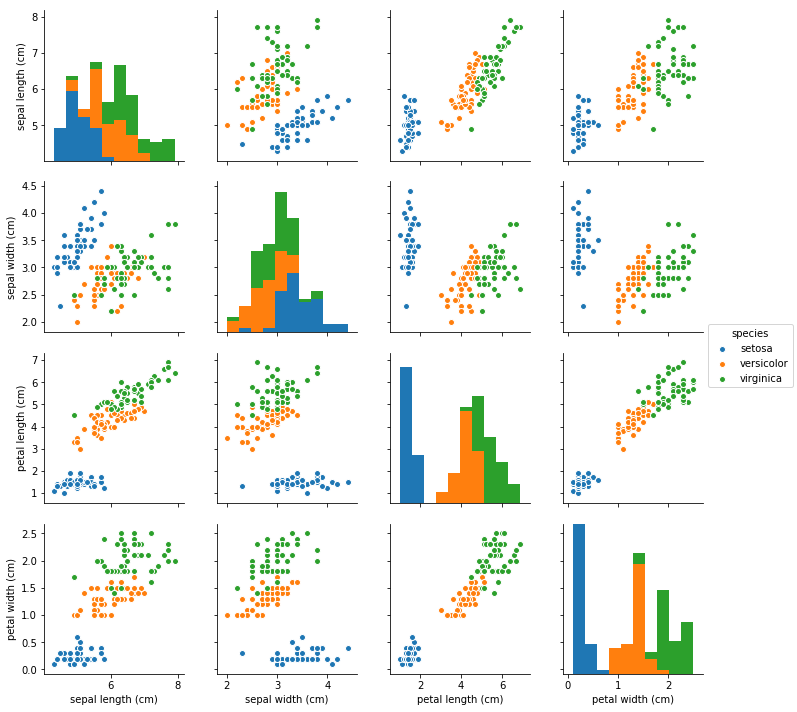

In [55]:
# use Seaborn to pair plot the features
sns.pairplot(df, hue='species')

Notice that the species **setosa** is easily identifiable by the petal width and petal length.

Lets split the data into training and test sets and stratify on the species value so the data sets contain a balanced number of representative species.  

In [56]:
from sklearn.model_selection import train_test_split
X = df[iris.feature_names]
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, shuffle=True, stratify=iris.target, random_state=123456)


In [57]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (75, 4)
y_train.shape: (75,)
X_test.shape: (75, 4)
y_test.shape: (75,)


Lets use a **RandomForestClassifier** to fit to the training.

The *out-of-bag* estimate is not normally computed so we have to set that particular option.

For more information on *out-of-bag* errors, see this scikit-learn [page](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)

"The out-of-bag (OOB) error is the average error for each z_i calculated using predictions from the trees that do not contain z_i in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being trained [1]."

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
print(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)


In [60]:
# Fit the RandomForestClassifier with the training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

 For a random forest classifier, the out-of-bag score computed by sklearn is an estimate of the classification accuracy we might expect to observe on new data. We’ll compare this to the actual score obtained on our test data.

In [61]:
from sklearn.metrics import accuracy_score

y_predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)

print(f"Out-of-bag score estimate: {rf.oob_score_:.3}")
print(f"Mean accuracy score: {accuracy:.3}")

Out-of-bag score estimate: 0.973
Mean accuracy score: 0.933


## Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[25  0  0]
 [ 0 25  0]
 [ 0  5 20]]


Lets use Seaborn to visualize the Confusion Matrix

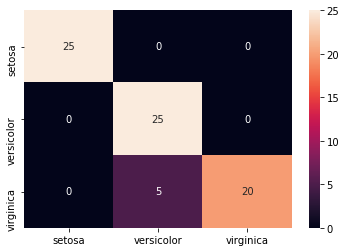

In [65]:
cm2 = pd.DataFrame(cm, columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm2, annot=True)

## OOB Errors for Random Forest Classifier

This section is taken from the scikit-learn documentation and shows how the OOB error rate is impacted by n_estimators and the max_features paramter

Automatically created module for IPython interactive environment


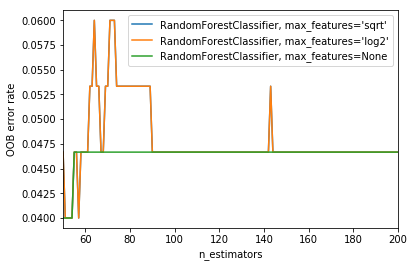

In [67]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Random Forest Classifier for Regression

**Directly from the mentioned blog post above**

"Now let’s look at using a random forest to solve a regression problem. The Boston housing data set consists of census housing price data in the region of Boston, Massachusetts, together with a series of values quantifying various properties of the local area such as crime rate, air pollution, and student-teacher ratio in schools. The question for us is whether we can use these data to accurately predict median house prices. One caveat of this data set is that the median house price is truncated at 50k which suggests that there may be considerable noise in this region of the data. You might want to remove all data with a median house price of 50k from the set and see if the regression improves at all.

As before we’ll load the data into a pandas dataframe. This time, however, we’re going to do some pre-processing of our data by independently transforming each feature to have zero mean and unit variance. The values of different features vary greatly in order of magnitude. If we were to analyse the raw data as-is, we run the risk of our analysis being skewed by certain features dominating the variance. This isn’t strictly necessary for a random forest, but will enable us to perform a more meaningful principal component analysis later. Performing this transformation in sklearn is super simple using the StandardScaler class of the preprocessing module. This time we’re going to use an 80/20 split of our data. You could bin the house prices to perform stratified sampling, but we won’t worry about that for now."


In [68]:
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [86]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [70]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.291339,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
15,-0.333810,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
332,-0.400723,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
423,0.391278,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
19,-0.322701,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [71]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,-0.394275,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
274,-0.398264,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
491,-0.392699,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
72,-0.394291,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
452,0.169988,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


With the data standardised, let’s do a quick principal-component analysis to see if we could reduce the dimensionality of the problem. This is quick and easy in sklearn using the PCA class of the decomposition module.

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

# matplotlib boilerplate goes here

In [75]:
cpts.shape
cpts_scaled.shape

(404, 13)

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [82]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
y_predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, y_predicted_test)
spearman = spearmanr(y_test, y_predicted_test)
pearson = pearsonr(y_test, y_predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.841
Test data R-2 score: 0.886
Test data Spearman correlation: 0.904
Test data Pearson correlation: 0.942
